In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt

# Actividad 04: Raices y ecuaciones de una variable

---
### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2025-1
---

# 1

El método de **Regula Falsi** es una modificación al método de Bisección. Con base en los siguientes pasos, escriba una función que calcule la raiz de una función. Pruebe con $x^2 - 4 = 0$, y examine la convergencia en función de la tolerancia.


### Pasos

1. **Inicialización**:
   - Se parte de un intervalo $[a, b]$ donde $f(a)$ y $f(b)$ tienen signos opuestos.
   - Esto garantiza que hay al menos una raíz en el intervalo (por el teorema del valor intermedio).

2. **Cálculo del punto de intersección**:
   - En lugar de tomar el punto medio como en la bisección, se calcula un punto c usando la siguiente fórmula:
     
     $$c = \frac{a \cdot f(b) - b \cdot f(a)}{f(b) - f(a)}$$

   - Esta fórmula representa la intersección de la línea que conecta los puntos $(a, f(a))$ y $(b, f(b))$ con el eje $x$.

3. **Evaluación y actualización del intervalo**:
   - Se evalúa $f(c)$.
   - Si $f(c) = 0$ (o es menor que una tolerancia establecida), $c$ es la raíz buscada.
   - Si $f(c)$ tiene el mismo signo que $f(a)$, se actualiza $a = c$.
   - Si $f(c)$ tiene el mismo signo que $f(b)$, se actualiza $b = c$.

4. **Iteración**:
   - Se repiten los pasos 2 y 3 hasta que se cumpla un criterio de parada (por ejemplo, $|f(c)| < tolerancia$ o se alcance un número máximo de iteraciones).

In [2]:

def Regula_Falsi(f,a,b,tol, max_iter = 100): # entra funcion implicita, tipo lambda

    if f(a) * f(b) >= 0: #evaluamos si se cumple esat condicion
       raise ValueError('f(a) y f(b) deben tener signos diferentes')

    for i in range(max_iter): # controlar el numero maximo de ciclos
      c = (a* f(b) - b * f(a)) / (f(b)-f(a))

      if abs(f(c)) == 0 or abs(f(c)) < tol: #la raiz
         return c, i+1

      elif f(c)*f(a) < 0:
        a = c
      elif f(c)*f(b) < 0:
        b = c
    raise RuntimeError(f'no se encontro la raiz despues de {max_iter} iteraciones')

In [3]:
tolerancias = [1e-3, 1e-5, 1e-8, 1e-10, 1e-12, 1e-15]
f = lambda x: x**2 - 4
for i in tolerancias:
  raiz, n = Regula_Falsi(f,4,-1,i,max_iter=1000)
  print(f'La raiz con una tolerancia de {i} es: {raiz} con {n} iteraciones')

La raiz con una tolerancia de 0.001 es: -2.000203231378925 con 10 iteraciones
La raiz con una tolerancia de 1e-05 es: -1.9999991636995424 con 15 iteraciones
La raiz con una tolerancia de 1e-08 es: -1.999999998852811 con 21 iteraciones
La raiz con una tolerancia de 1e-10 es: -1.999999999985837 con 25 iteraciones
La raiz con una tolerancia de 1e-12 es: -1.9999999999998253 con 29 iteraciones
La raiz con una tolerancia de 1e-15 es: -1.9999999999999998 con 35 iteraciones


In [4]:
tolerancias = [1e-3, 1e-5, 1e-8, 1e-10, 1e-12, 1e-15]
f = lambda x: x**2 - 4
for i in tolerancias:
  raiz, n = Regula_Falsi(f,-4,1,i,max_iter=1000)
  print(f'La raiz con una tolerancia de {i} es: {raiz} con {n} iteraciones')

La raiz con una tolerancia de 0.001 es: 2.000203231378925 con 10 iteraciones
La raiz con una tolerancia de 1e-05 es: 1.9999991636995424 con 15 iteraciones
La raiz con una tolerancia de 1e-08 es: 1.999999998852811 con 21 iteraciones
La raiz con una tolerancia de 1e-10 es: 1.999999999985837 con 25 iteraciones
La raiz con una tolerancia de 1e-12 es: 1.9999999999998253 con 29 iteraciones
La raiz con una tolerancia de 1e-15 es: 1.9999999999999998 con 35 iteraciones


In [5]:
tolerancias = [1e-3, 1e-5, 1e-8, 1e-10, 1e-12, 1e-15]
f = lambda x: x**2 - 4
for i in tolerancias:
  raiz, n = Regula_Falsi(f,-1,3,i,max_iter=1000)
  print(f'La raiz con una tolerancia de {i} es: {raiz} con {n} iteraciones')

La raiz con una tolerancia de 0.001 es: 1.9998420601918814 con 23 iteraciones
La raiz con una tolerancia de 1e-05 es: 2.0000015917328553 con 32 iteraciones
La raiz con una tolerancia de 1e-08 es: 1.9999999979210872 con 45 iteraciones
La raiz con una tolerancia de 1e-10 es: 2.000000000020951 con 54 iteraciones
La raiz con una tolerancia de 1e-12 es: 1.9999999999997888 con 63 iteraciones
La raiz con una tolerancia de 1e-15 es: 1.9999999999999998 con 77 iteraciones


El metodo es muy sensible a los 2 puntos que se le ingrese, para este caso la funcion tiene raiz en 2 puntos, por lo que dependiendo de los puntos puede llegar a uno o al otro, en algunos casos hasta con 1000 iteraciones y con puntos no muy alejado le costaba converger. sin embargo considero que con almenos 50 iteraciones logra darnos muy buenos resultados en relacion a buena tolerancia.


# 2

Una carga total $Q$ se distribuye uniformemente alrededor de un conductor en forma de anillo de radio $a$. Una carga $q$ se encuentra a una distancia $x$ horizontalmente a través del centro del anillo. La fuerza ejercida sobre la carga por el anillo está dada por:

$$F = \frac{1}{4\piϵ_0}\frac{qQx}{(x^2+a^2)^{3/2}}$$

con $q$ y $Q$ de $2\times 10^{-5}$C.

  * Escriba una función donde ingresen los valores de $a$ y $x$ para hallar la fuerza.
  * Haga un gráfico de $F(x)$ para un anillo de radio $a= 0.85$m para $0.1\leq x\leq 2.0$m
  * Usando el método de Newton-Raphson y otro diferente, para encontrar el valor de $x$ en el cual la fuerza será equivalente a 1.25 N.
  * Encuentre qué sucede si disminuimos el radio con respecto a la fuerza que experimentará la carga $q$.

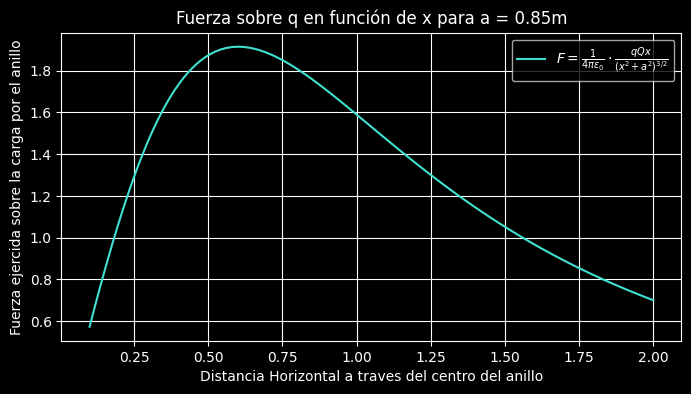

In [6]:
from numpy import pi

q = 2e-5
Q = 2e-5
e0= 8.8541878188e-12
def Fuerza(a,x):
  c = 1/(4*pi*e0)
  F = c*(q*Q*x)/((x**2 + a**2)**(1.5))
  return F

a= 0.85
x = np.linspace(0.1,2.0,100)
y = Fuerza(a,x)


plt.style.use('dark_background')
plt.figure(figsize=(8,4))
plt.title("Fuerza sobre q en función de x para a = 0.85m")
plt.plot(x,y,label =r'$F = \frac{1}{4\pi\varepsilon_0} \cdot \frac{qQx}{(x^2+a^2)^{3/2}}$', color = 'turquoise')
plt.xlabel('Distancia Horizontal a traves del centro del anillo')
plt.ylabel('Fuerza ejercida sobre la carga por el anillo')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
from scipy.optimize import newton

def f(x):
    return Fuerza(a, x) - 1.25

def df(x):
    a = 0.85
    num = q * Q * ( (x**2 + a**2)**(1.5) - 3 * x**2 * (x**2 + a**2)**0.5 )
    denom = (x**2 + a**2)**3
    return (1 / (4 * np.pi * e0)) * (num / denom)

raiz_newton = newton(f,x0 = 0.4 ,fprime=df)
print(f'valor de la raiz con newton: {raiz_newton: .4f}')
raiz_secante = newton(f, x0=0, x1=0.5)
print(f'valor de la raiz con secante: {raiz_secante: .4f}')

valor de la raiz con newton:  0.2394
valor de la raiz con secante:  0.2394


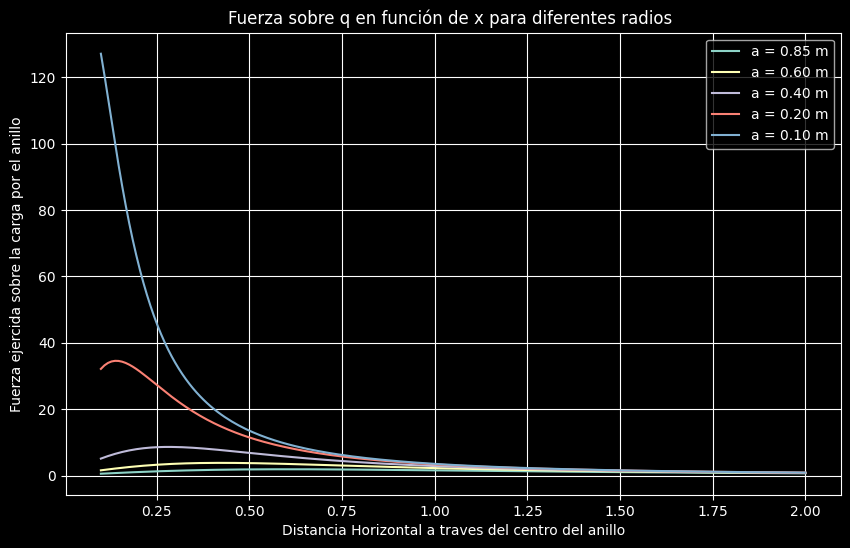

In [8]:
a_val = [0.85, 0.6, 0.4, 0.2, 0.1]
x = np.linspace(0.1, 2.0, 200)

plt.figure(figsize=(10,6))
for a in a_val:
    F_val = Fuerza(a, x)
    plt.plot(x, F_val, label=f'a = {a:.2f} m')

plt.style.use('dark_background')
plt.title('Fuerza sobre q en función de x para diferentes radios ')
plt.xlabel('Distancia Horizontal a traves del centro del anillo')
plt.ylabel('Fuerza ejercida sobre la carga por el anillo')
plt.legend()
plt.grid(True)
plt.show()

De la grafica lo que podemos notar es que al disminuir el tamaño del radio a, la fuerza que experimenta la carga q es cada vez mayor.

# 3

La velocidad ascendente $v$ de un cohete se puede calcular mediante
$$v = u\ln \frac{m_0}{m_0 - qt} - gt$$

donde $u$ es la velocidad a la que se expulsa el combustible, $m_0$ la masa inicial del cohete en $t = 0$, $q$ la razón de consumo del combustible y $g = 9.81$ m/s$^2$.

* Escriba una función para $v$ con las variables asociadas.
* Sea $m_0 = 1.6\times 10^5$ kg, $u = 1800$ m/s y $q = 2600$ kg/s realice un grafico de $v(t)$ para $0\leq t\leq 100$ s.
* Encuentre el valor de tiempo para el cual $v = 750$ m/s usando el método de Newton-Raphson, Bisección y el de Regula-Falsi
* Varie los valores de $u$ (utilice por lo menos 20) y encuentre los tiempos para los cuales el cohete alcanzará la velocidad de 750 m/s. Qué conclusiones puede sacar?



<ipython-input-9-4535faf514f1>:11: RuntimeWarning: invalid value encountered in log
  return u * np.log(m0 / (m0 - q * t)) - g * t


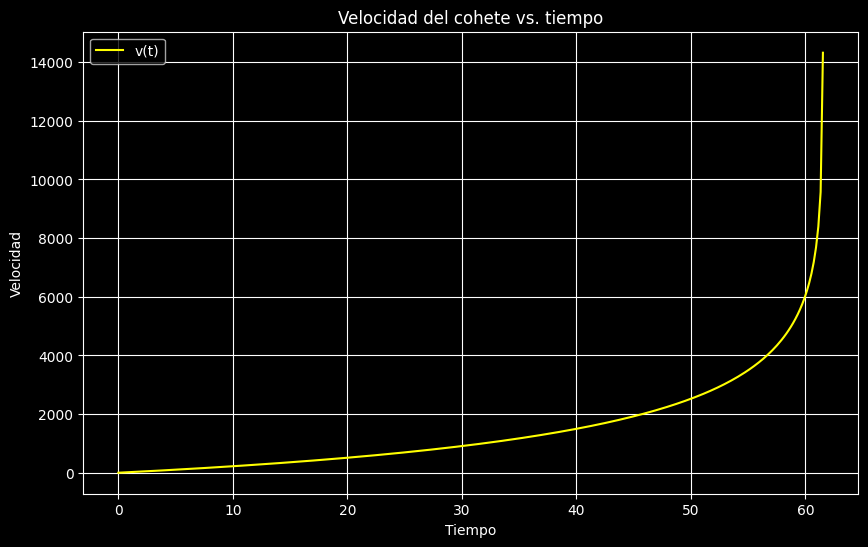

In [9]:
g=9.8
def v(t,u,m0,q):
    return u * np.log(m0 / (m0 - q * t)) - g * t

t = np.linspace(0,100,500)

def v_s(t):
  m0 = 1.6e5
  u = 1800
  q = 2600
  return u * np.log(m0 / (m0 - q * t)) - g * t
vs = v_s(t)

plt.figure(figsize=(10,6))
plt.style.use('dark_background')
plt.plot(t, vs, label='v(t)', color='yellow')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.title('Velocidad del cohete vs. tiempo')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
from scipy.optimize import bisect

def fv(t):
    #m0 = 1.6e5
    #u = 1800
    #q = 2600
    #return (u * np.log(m0 / (m0 - q * t)) - g * t) - 750
    return v_s(t) - 750

def df(t, h=1e-3):
    return (fv(t + h) - fv(t - h)) / (2 * h)

In [11]:
raiz_newton2 = newton(fv, x0=26, fprime= df)
print(f"Newton-Raphson: t = {raiz_newton:.4f} s")

raiz_biseccion = bisect(fv, 1, 50)
print(f"Bisección: t = {raiz_biseccion:.4f} s")

raiz_regula = Regula_Falsi(fv, 1, 50, tol=1e-12)
print(f"Regula-Falsi: t =  {raiz_regula} s")

Newton-Raphson: t = 0.2394 s
Bisección: t = 26.4015 s
Regula-Falsi: t =  (np.float64(26.4014742854098), 23) s
